In [62]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, kstest

Take the S&P500 dataset and calculate the log returns, i.e., rt = log(Pt=Pt1), using the adjusted closing prices.
(a) Construct and plot the empirical cumulative distribution function (ECDF) of rt.

In [2]:


# Step 1: Load the S&P500 Dataset
#Lets download the SP500
import yfinance as yf
data = yf.download('^GSPC','2010-01-01','2020-01-01')
data.to_csv('SP500.csv')

[*********************100%%**********************]  1 of 1 completed


In [63]:

# Assuming you have a CSV file named 'SP500.csv' with a column 'Adj Close' for adjusted closing prices
sp500_data = pd.read_csv('SP500.csv')
adjusted_closing_prices = sp500_data['Adj Close']

# Step 2: Calculate Log Returns
log_returns = np.log(adjusted_closing_prices / adjusted_closing_prices.shift(1)).dropna()


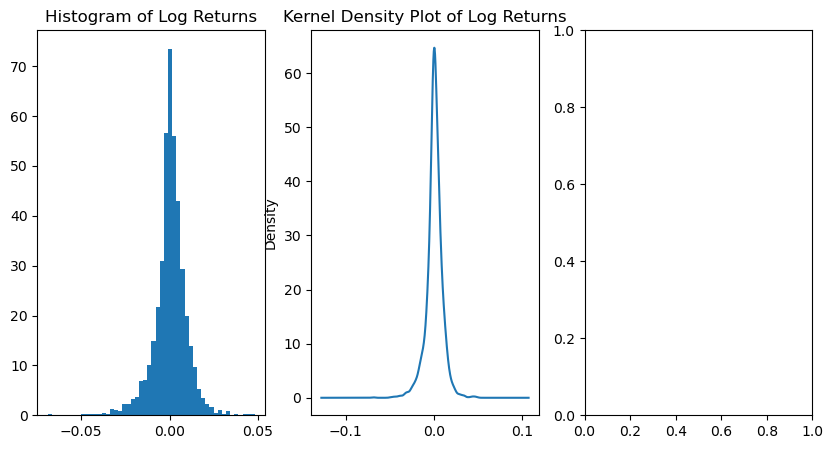

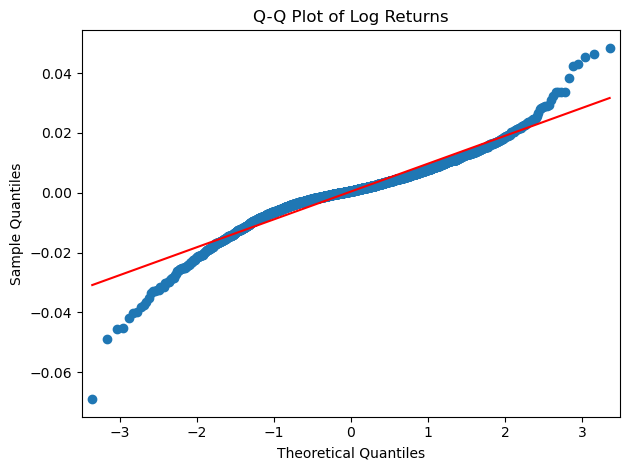

In [64]:
#Lets create a hist plot, kernel density plot and Q-Q plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(log_returns, bins=50, density=True)
plt.title('Histogram of Log Returns')
plt.subplot(1, 3, 2)
log_returns.plot.kde()
plt.title('Kernel Density Plot of Log Returns')
plt.subplot(1, 3, 3)
sm.qqplot(log_returns, line='s') # qqplot compare with a standard normal distribution
plt.title('Q-Q Plot of Log Returns')
plt.tight_layout() # Automatically adjust subplot parameters to give specified padding
plt.show()

Construct and plot the empirical cumulative distribution function (ECDF) of rt.

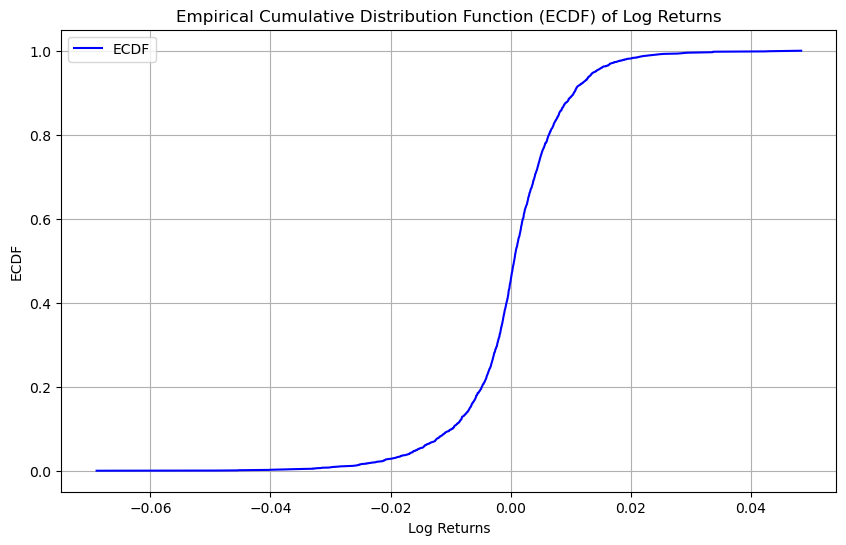

In [65]:

# (a) Construct and Plot the ECDF
plt.figure(figsize=(10, 6))
ecdf = sm.distributions.ECDF(log_returns)
#sm.distributions.ECDF() returns a function that can be called with a vector of observations to get the ECDF
plt.plot(ecdf.x, ecdf.y, label='ECDF', color='blue')
plt.xlabel('Log Returns')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Log Returns')
plt.legend()
plt.grid()
plt.show()



(b) Construct and plot the pointwise and uniform 95% confidence bands for the cumulative distribution function (CDF). Explain the differences between these two types of confidence bands.

In [66]:

# (b) Construct and Plot 95% Pointwise and Uniform Confidence Bands for CDF

# Calculate Pointwise Confidence Intervals
n = len(log_returns)
alpha = 0.05 # 95% Confidence Level
z = norm.ppf(1 - alpha / 2) # 1 - alpha/2 quantile of standard normal distribution

# Pointwise Confidence Bands
pw_lower = ecdf.y - z * np.sqrt((ecdf.y * (1 - ecdf.y)) / n) # Lower Confidence Bound
pw_upper = ecdf.y + z * np.sqrt((ecdf.y * (1 - ecdf.y)) / n) # Upper Confidence Bound



In [67]:
#Now the uniform confidence band
# Number of simulations
B = 1000

# Number of points (sample size)
n = len(log_returns)

# Significance level
alpha = 0.05

# Parameters for the normal distribution under the null hypothesis
mu = np.mean(log_returns)  # Mean of the log returns
sigma = np.std(log_returns)  # Standard deviation of the log returns

# Null hypothesis CDF (normal distribution with given mean and variance)
F_0 = lambda x: norm.cdf(x, loc=mu, scale=sigma)

# Generating B empirical cumulative distribution functions
D_values = []
for _ in range(B):
    # Generate random sample from the given normal distribution
    sample = np.random.normal(mu, sigma, n)
    
    # Empirical CDF
    ecdf = sm.distributions.ECDF(sample)
    
    # Create grid for evaluation
    x_grid = np.linspace(min(sample), max(sample), 1000)
    
    # Compute test statistic D_n
    D_n = np.max(np.sqrt(n) * np.abs(ecdf(x_grid) - F_0(x_grid)))
    D_values.append(D_n)

# Estimating critical value q_1-alpha
q_1_alpha = np.percentile(D_values, 100 * (1 - alpha))

# Kolmogorov-Smirnov test statistic for the log returns sample
ecdf = sm.distributions.ECDF(log_returns)
x_grid = np.linspace(min(log_returns), max(log_returns), 1000)
D_n = np.max(np.sqrt(n) * np.abs(ecdf(x_grid) - F_0(x_grid)))

# Compute the uniform 95% confidence band for the ECDF
lower_bound = np.maximum(0, ecdf(x_grid) - q_1_alpha / np.sqrt(n))
upper_bound = np.minimum(1, ecdf(x_grid) + q_1_alpha / np.sqrt(n))

# Plotting the ECDF, the CDF, and the confidence bands
y_cdf = F_0(x_grid)
y_ecdf = ecdf(x_grid)


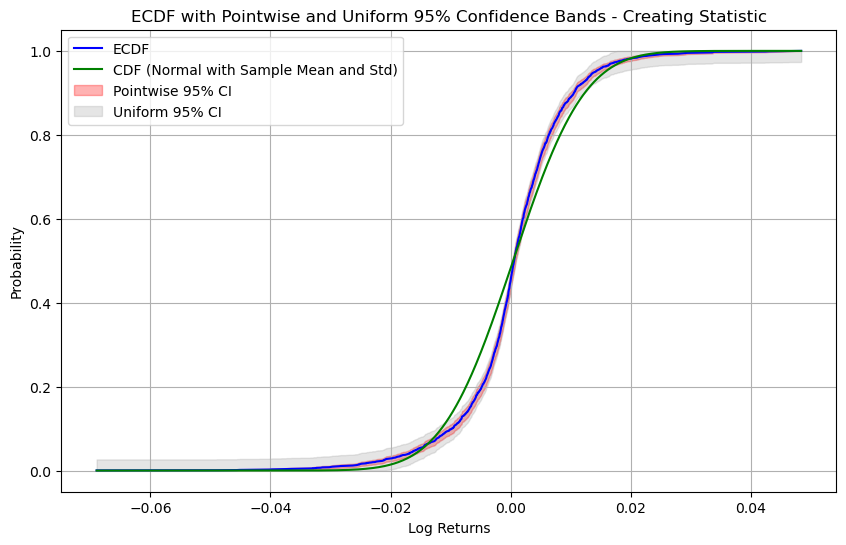

In [68]:
#Lets plot this uniform 95% confidence band for the ECDF and the pointwise 95% confidence band for the CDF
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, label='ECDF', color='blue')
plt.plot(x_grid, F_0(x_grid), label='CDF (Normal with Sample Mean and Std)', color='green')
plt.fill_between(ecdf.x, pw_lower, pw_upper, color='red', alpha=0.3, label='Pointwise 95% CI')
plt.fill_between(x_grid, lower_bound, upper_bound, color='gray', alpha=0.2, label='Uniform 95% CI')
plt.xlabel('Log Returns')
plt.ylabel('Probability')
plt.title('ECDF with Pointwise and Uniform 95% Confidence Bands - Creating Statistic')
plt.legend()
plt.grid()
plt.show()

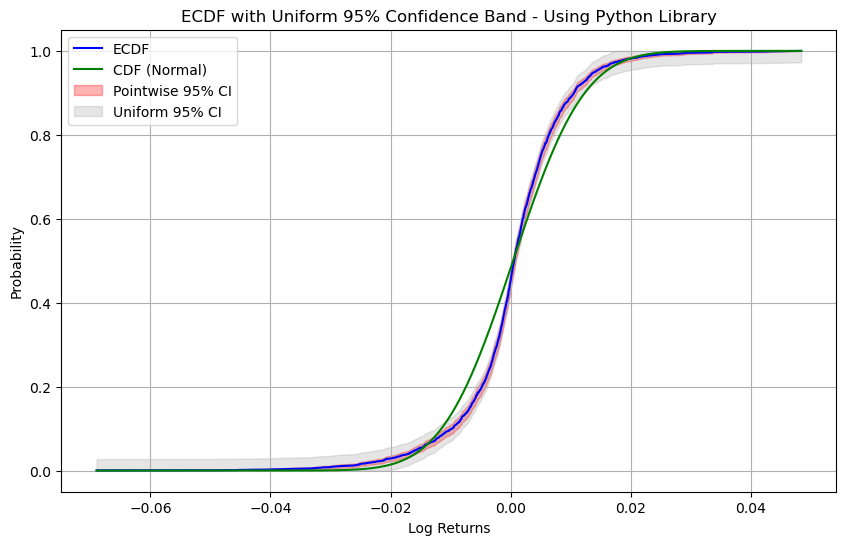

In [69]:
#We now plot the uniform 95% confidence band for the ECDF, using critical_value = kstwobign.ppf(1 - alpha) / np.sqrt(n) where kstwobign is the Kolmogorov-Smirnov distribution
from scipy.stats import kstest, kstwobign, norm
plt.figure(figsize=(10, 6))
alpha = 0.05
critical_value = kstwobign.ppf(1 - alpha) / np.sqrt(n)
ecdf = sm.distributions.ECDF(log_returns)
x_grid = np.linspace(min(log_returns), max(log_returns), 2516)
y_ecdf = ecdf(x_grid)
uniform_lower = np.maximum(0, y_ecdf - critical_value)
uniform_upper = np.minimum(1, y_ecdf + critical_value)


plt.plot(ecdf.x, ecdf.y, label='ECDF', color='blue')
plt.plot(x_grid, F_0(x_grid), label='CDF (Normal)', color='green')

plt.fill_between(ecdf.x, pw_lower, pw_upper, color='red', alpha=0.3, label='Pointwise 95% CI')
plt.fill_between(x_grid, uniform_lower, uniform_upper, color='gray', alpha=0.2, label='Uniform 95% CI')
plt.xlabel('Log Returns')
plt.ylabel('Probability')
plt.title('ECDF with Uniform 95% Confidence Band - Using Python Library')
plt.legend()
plt.grid()
plt.show()

Now we test H0 : rt ~ iid N(0.0047706;(0.044505)^2)

Test statistic D_n: 18.454696825343266
Critical value q_1-alpha: 1.2745476793957242
Reject null hypothesis: True
P-value: 0.0


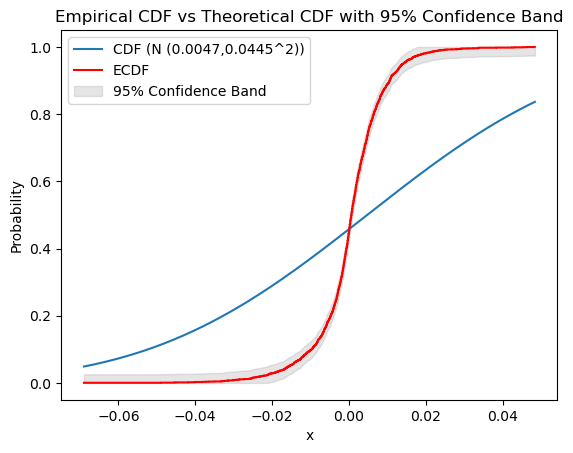

In [70]:

# Load your data (log returns series)
# For demonstration purposes, we'll create some synthetic log returns

# Number of simulations
B = 1000

# Number of points (sample size)
n = len(log_returns)

# Significance level
alpha = 0.05

# Parameters for the normal distribution under the null hypothesis
mu = 0.0047706  # Mean of the log returns
sigma = 0.044505  # Standard deviation of the log returns

# Null hypothesis CDF (normal distribution with given mean and variance)
F_0 = lambda x: norm.cdf(x, loc=mu, scale=sigma)

# Generating B empirical cumulative distribution functions
D_values = []
for _ in range(B):
    # Generate random sample from the given normal distribution
    sample = np.random.normal(mu, sigma, n)
    
    # Empirical CDF
    ecdf = sm.distributions.ECDF(sample)
    
    # Create grid for evaluation
    x_grid = np.linspace(min(sample), max(sample), 1000)
    
    # Compute test statistic D_n
    D_n = np.max(np.sqrt(n) * np.abs(ecdf(x_grid) - F_0(x_grid)))
    D_values.append(D_n)

# Estimating critical value q_1-alpha
q_1_alpha = np.percentile(D_values, 100 * (1 - alpha))

# Kolmogorov-Smirnov test statistic for the log returns sample
ecdf = sm.distributions.ECDF(log_returns)
x_grid = np.linspace(min(log_returns), max(log_returns), 1000)
D_n = np.max(np.sqrt(n) * np.abs(ecdf(x_grid) - F_0(x_grid)))

# Reject or not
reject_H0 = D_n > q_1_alpha

# Calculate p-value
p_value = np.mean(np.array(D_values) >= D_n)

print(f"Test statistic D_n: {D_n}")
print(f"Critical value q_1-alpha: {q_1_alpha}")
print(f"Reject null hypothesis: {reject_H0}")
print(f"P-value: {p_value}")

# Compute the uniform 95% confidence band for the ECDF
lower_bound = np.maximum(0, ecdf(x_grid) - q_1_alpha / np.sqrt(n))
upper_bound = np.minimum(1, ecdf(x_grid) + q_1_alpha / np.sqrt(n))

# Plotting the ECDF, the CDF, and the confidence bands
y_cdf = F_0(x_grid)
y_ecdf = ecdf(x_grid)

plt.plot(x_grid, y_cdf, label="CDF (N (0.0047,0.0445^2))")
plt.step(x_grid, y_ecdf, where="post", label="ECDF", color='red')
plt.fill_between(x_grid, lower_bound, upper_bound, color='gray', alpha=0.2, label="95% Confidence Band")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.title("Empirical CDF vs Theoretical CDF with 95% Confidence Band")
plt.show()


The Kolmogorov-Smirnov test rejected the null hypothesis. The t-value of the test is 0.

In [71]:

# (c) Kolmogorov-Smirnov Test for Normality with Given Mean and Variance
mean = 0.0047706
std_dev = 0.044505
ks_stat, p_value = kstest(log_returns, 'norm', args=(mean, std_dev)) # Kolmogorov-Smirnov Test

print(f'Kolmogorov-Smirnov Statistic: {ks_stat}')
print(f'p-value: {p_value}')

# Interpretation of KS Test
if p_value < 0.05:
    print('Reject the null hypothesis: The log returns do not follow the specified normal distribution.')
else:
    print('Fail to reject the null hypothesis: The log returns may follow the specified normal distribution.')


Kolmogorov-Smirnov Statistic: 0.3681562823307547
p-value: 3.173254029369194e-306
Reject the null hypothesis: The log returns do not follow the specified normal distribution.


The test reject that rt follows a distribution like N(0.0047706;(0.044505)^2).

Now we test H0 : rt is iid normally distributed.

Test statistic D_n: 4.821559969343861
Critical value q_1-alpha: 1.314225198049522
Reject null hypothesis: True
P-value: 0.0


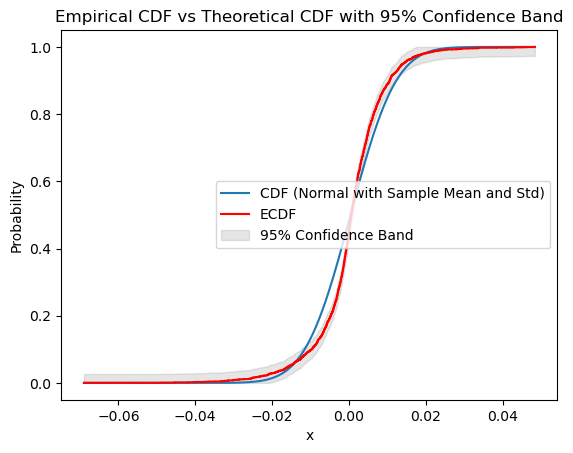

In [72]:

# Number of simulations
B = 1000

# Number of points (sample size)
n = len(log_returns)

# Significance level
alpha = 0.05

# Parameters for the normal distribution under the null hypothesis
mu = np.mean(log_returns)  # Mean of the log returns
sigma = np.std(log_returns)  # Standard deviation of the log returns

# Null hypothesis CDF (normal distribution with given mean and variance)
F_0 = lambda x: norm.cdf(x, loc=mu, scale=sigma)

# Generating B empirical cumulative distribution functions
D_values = []
for _ in range(B):
    # Generate random sample from the given normal distribution
    sample = np.random.normal(mu, sigma, n)
    
    # Empirical CDF
    ecdf = sm.distributions.ECDF(sample)
    
    # Create grid for evaluation
    x_grid = np.linspace(min(sample), max(sample), 1000)
    
    # Compute test statistic D_n
    D_n = np.max(np.sqrt(n) * np.abs(ecdf(x_grid) - F_0(x_grid)))
    D_values.append(D_n)

# Estimating critical value q_1-alpha
q_1_alpha = np.percentile(D_values, 100 * (1 - alpha))

# Kolmogorov-Smirnov test statistic for the log returns sample
ecdf = sm.distributions.ECDF(log_returns)
x_grid = np.linspace(min(log_returns), max(log_returns), 1000)
D_n = np.max(np.sqrt(n) * np.abs(ecdf(x_grid) - F_0(x_grid)))

# Reject or not
reject_H0 = D_n > q_1_alpha

# Calculate p-value
p_value = np.mean(np.array(D_values) >= D_n)

print(f"Test statistic D_n: {D_n}")
print(f"Critical value q_1-alpha: {q_1_alpha}")
print(f"Reject null hypothesis: {reject_H0}")
print(f"P-value: {p_value}")

# Compute the uniform 95% confidence band for the ECDF
lower_bound = np.maximum(0, ecdf(x_grid) - q_1_alpha / np.sqrt(n))
upper_bound = np.minimum(1, ecdf(x_grid) + q_1_alpha / np.sqrt(n))

# Plotting the ECDF, the CDF, and the confidence bands
y_cdf = F_0(x_grid)
y_ecdf = ecdf(x_grid)

plt.plot(x_grid, y_cdf, label="CDF (Normal with Sample Mean and Std)")
plt.step(x_grid, y_ecdf, where="post", label="ECDF", color='red')
plt.fill_between(x_grid, lower_bound, upper_bound, color='gray', alpha=0.2, label="95% Confidence Band")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.title("Empirical CDF vs Theoretical CDF with 95% Confidence Band")
plt.show()


In [73]:
ks_stat, p_value = kstest(log_returns, 'norm') # Kolmogorov-Smirnov Test

print(f'Kolmogorov-Smirnov Statistic: {ks_stat}')
print(f'p-value: {p_value}')

# Interpretation of KS Test
if p_value < 0.05:
    print('Reject the null hypothesis: The log returns do not follow the specified normal distribution.')
else:
    print('Fail to reject the null hypothesis: The log returns may follow the specified normal distribution.')


Kolmogorov-Smirnov Statistic: 0.4841488202816384
p-value: 0.0
Reject the null hypothesis: The log returns do not follow the specified normal distribution.


In [74]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test for the null hypothesis that data is independently distributed
# Set lags (number of autocorrelation lags to test)
lb_test = acorr_ljungbox(log_returns, return_df=True)

lb_test_results = pd.DataFrame({ 'Statistic': lb_test['lb_stat'], 'p-value': lb_test['lb_pvalue'] })
lb_test_results['Significance Level'] = lb_test_results['p-value'].apply(lambda x: 'Significant' if x < 0.05 else 'Not Significant')
print(lb_test_results)

    Statistic   p-value Significance Level
1    5.383117  0.020333        Significant
2    5.583838  0.061303    Not Significant
3    9.039083  0.028776        Significant
4    9.218240  0.055870    Not Significant
5   24.627273  0.000164        Significant
6   24.642225  0.000398        Significant
7   25.299880  0.000671        Significant
8   27.100481  0.000679        Significant
9   27.704548  0.001069        Significant
10  29.532938  0.001021        Significant


In [75]:
#Lets also test stationarity with the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
test_for_stationarity = adfuller(log_returns)
if test_for_stationarity[1] > 0.05:
    print('Fail to reject the null hypothesis: The log returns are non-stationary.')
else:
    print('Reject the null hypothesis: The log returns are stationary.')
    


Reject the null hypothesis: The log returns are stationary.


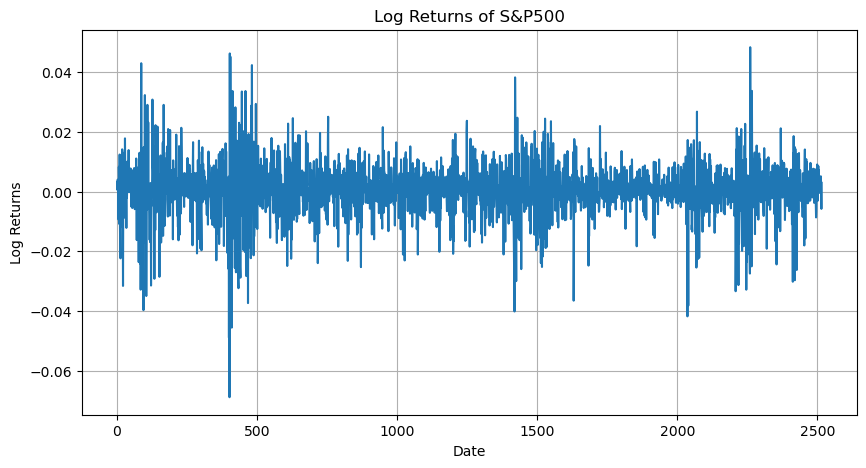

In [76]:
#Lets plot the log_returns
plt.figure(figsize=(10, 5))
plt.plot(log_returns)
plt.title('Log Returns of S&P500')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid()
plt.show()

In [77]:
#Lets test normality with the Shapiro-Wilk test
from scipy.stats import shapiro
test_for_normality = shapiro(log_returns)
if test_for_normality[1] > 0.05:
    print('Fail to reject the null hypothesis: The log returns are normally distributed.')
else:
    print('Reject the null hypothesis: The log returns are not normally distributed.')
    
    

Reject the null hypothesis: The log returns are not normally distributed.


Based on the results of the Kolmogorov-Smirnov (KS) test, we tested whether the log returns (rt) follow a normal distribution. The KS test results indicate that we reject the null hypothesis, suggesting that the log returns do not follow a normal distribution. Additionally, the Shapiro-Wilk test corroborates this finding, further confirming that the log returns deviate from normality.

Furthermore, the Ljung-Box Q test reveals significant autocorrelation in the log returns at several immediate lags, indicating that the returns are not independent over time.

Given these results, we conclude that the log returns do not follow an i.i.d. normal distribution, as they violate both the assumptions of normality and independence.